In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
# Load the dataset
file_path = 'd:/IntelliHack5/customer_behavior_analytcis.csv'
df = pd.read_csv(file_path)

In [5]:
# Display the first few rows of the dataset
print(df.head())

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  


In [6]:
# EDA - Exploratory Data Analysis
# Check for missing values
print(df.isnull().sum())

total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64


In [9]:
new_df = df.drop(columns=['customer_id'])

In [10]:
# EDA - Exploratory Data Analysis
# Check for missing values
print(new_df.isnull().sum())

total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
dtype: int64


In [12]:
# Fill missing values with the mean of the column
new_df.fillna(new_df.mean(), inplace=True)

In [14]:
# EDA - Exploratory Data Analysis
# Check for missing values
print(new_df.isnull().sum())

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
dtype: int64


In [16]:
# Summary statistics
print(new_df.describe())

       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       999.000000      999.000000        999.000000     999.000000   
mean         11.570991       75.457978         49.348759      28.237998   
std           6.945668       54.513261         32.730973      16.132267   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.350000         22.375000      16.000000   
50%          10.000000       49.920000         40.360000      21.000000   
75%          17.000000      118.490000         77.170000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       999.000000  
mean          4.313313  
std           4.532772  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  


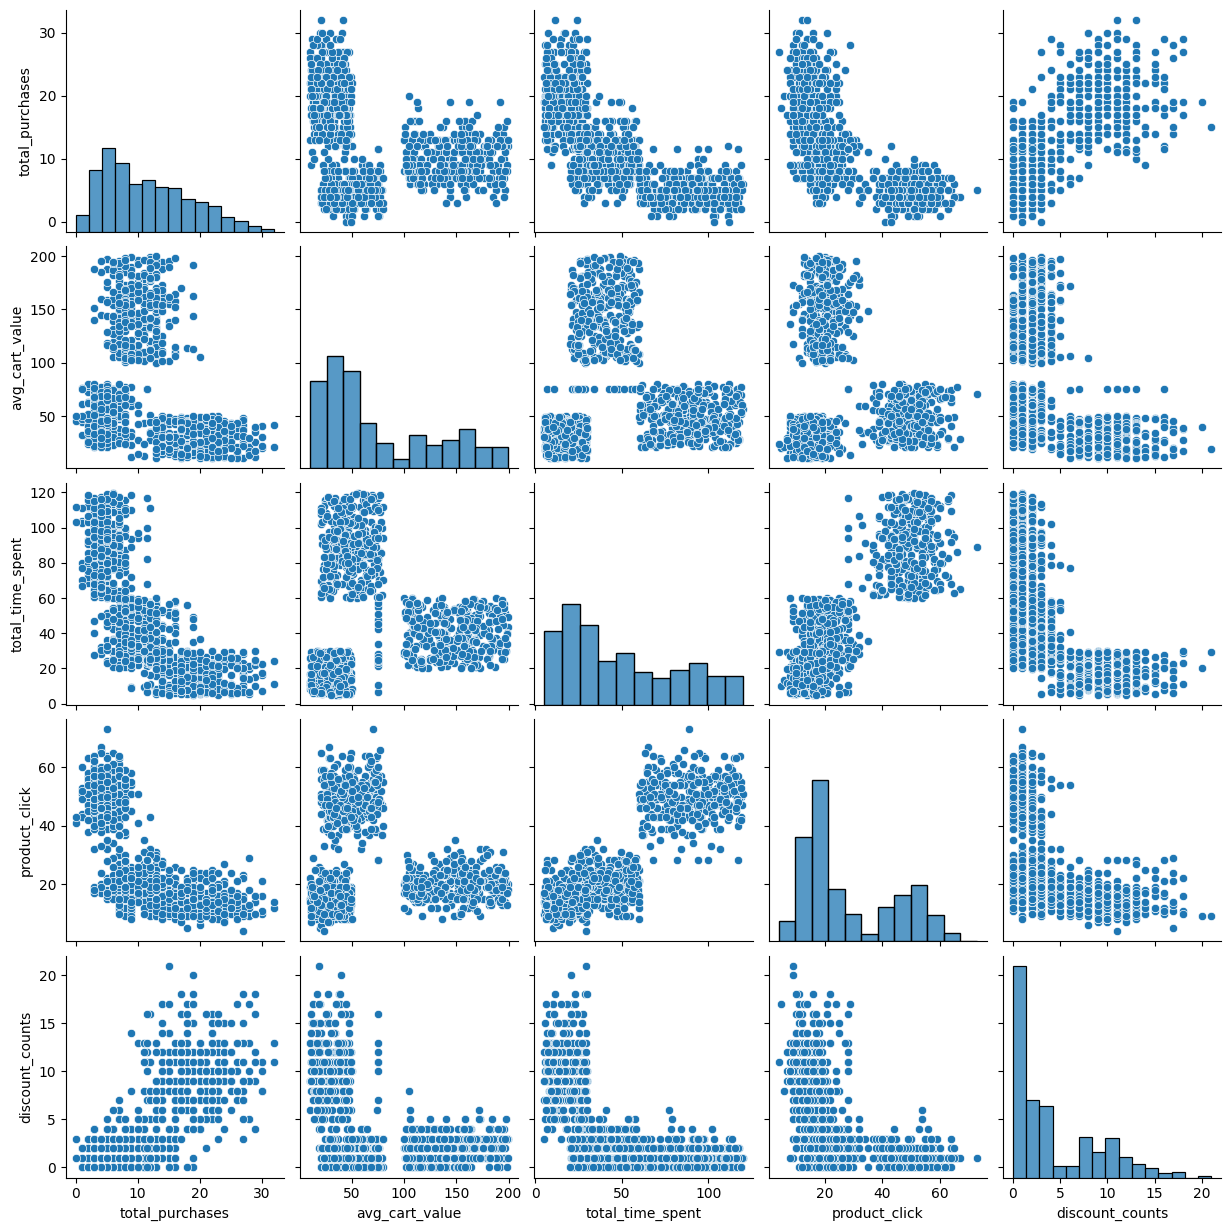

In [18]:
# Pairplot to visualize relationships between features
sns.pairplot(new_df)
plt.show()

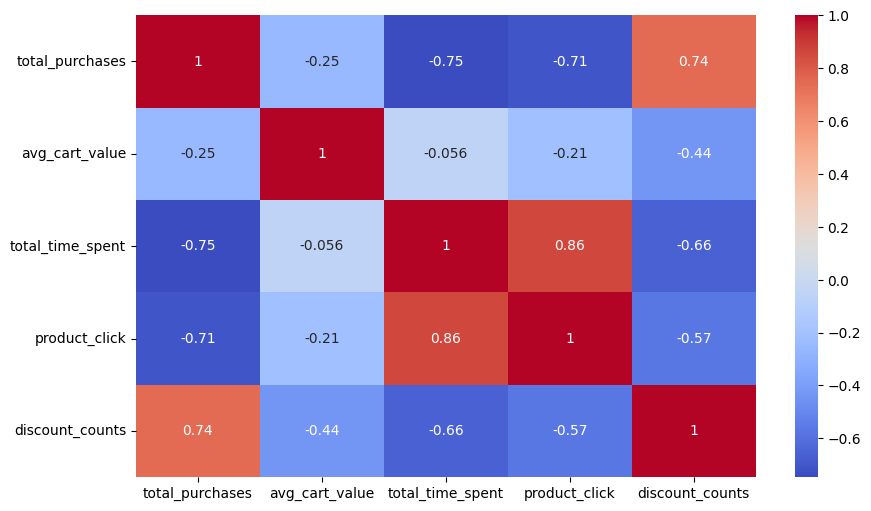

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [21]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_df)


In [22]:
# Model Selection - Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

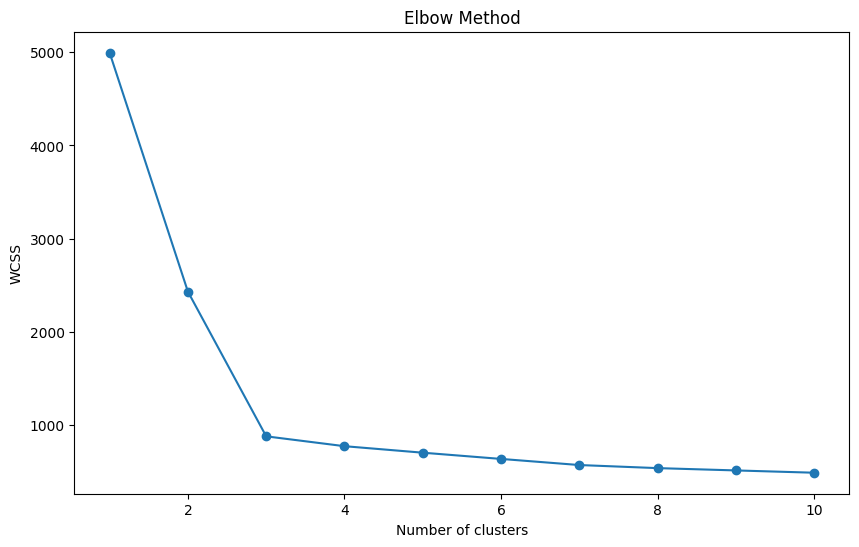

In [23]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
# From the Elbow Method, we choose the optimal number of clusters 
optimal_clusters = 3

In [25]:
# Model Training
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [26]:
# Model Evaluation - Silhouette Score
labels = kmeans.labels_
silhouette_avg = silhouette_score(df_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6132930516948745


In [27]:
# Add the cluster labels to the original dataframe
df['Cluster'] = labels

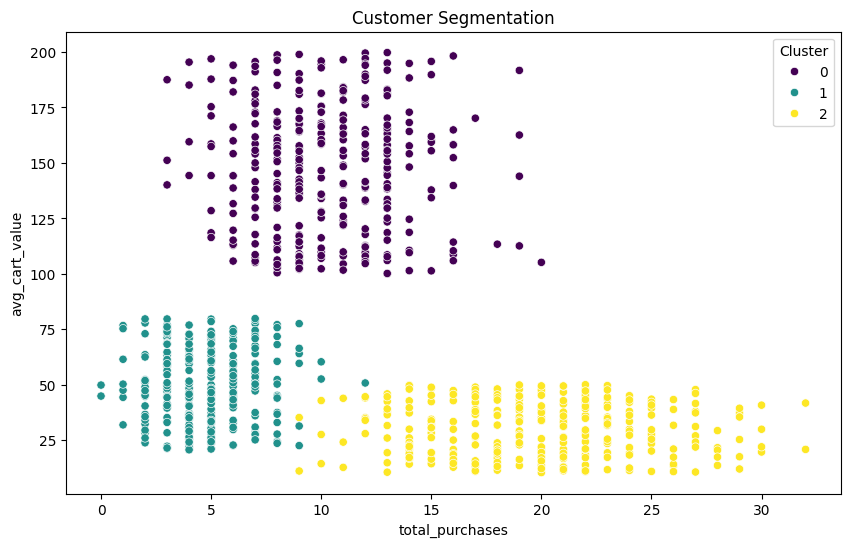

In [28]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_purchases', y='avg_cart_value', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation')
plt.show()